# Principal Component Analysis and Markov Chains


**Author: Jessica Cervi**

**Expected time = 2.5 hours**

**Total points = 80 points**
 
## Assignment Overview

In this assignment, we will work on principal component analysis. Principal component analysis (PCA) is a technique for reducing the dimensionality of datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

 In the second part of the assignment we will explain some basic concepts and familiarize with the theory about Markov chains. We will introduce you to one of the Python libraries, `quantecon` that come with the capability of simulating Markov chains processes. This second part of the assignment is intended to be more theory heavy, most of the coding about Markov chain will be asked for you to do in the next assignment.


This assignment is designed to build your familiarity and comfort in coding in Python. It will also help you review the key topics from each module. As you progress through the assignment, answers to the questions will get increasingly complex. You must adopt a data scientist's mindset when completing this assignment. Remember to run your code from each cell before submitting your assignment. Running your code beforehand will notify you of errors and giving you a chance to fix your errors before submitting it. You should view your Vocareum submission as if you are delivering a final project to your manager or client. 

***Vocareum Tips***
- Do not add arguments or options to functions unless asked specifically. This will cause an error in Vocareum.
- Do not use a library unless you are explicitly asked in the question. 
- You can download the Grading Report after submitting the assignment. It will include the feedback and hints on incorrect questions. 




### Learning Objectives
- Understand the implementation of principal components analysis using `sklearn`
- Understand the importance of preparing and scaling the data
- Understand and interpret the results
- Understand the mathematical foundations of Markov chains
- Implement Markov chains using `quantecon`
- Understand and interpret the results.


## Index: 

#### Principal Component Analysis and Markov Chains

+ [Question 01](#q01)
+ [Question 02](#q02)
+ [Question 03](#q03)
+ [Question 04](#q04)
+ [Question 05](#q05)
+ [Question 06](#q06)
+ [Question 07](#q07)
+ [Question 08](#q08)
+ [Question 09](#q09)







## Principal Component Analysis and Markov Chains



### Importing the dataset and exploratory data analysis

In the first part of this assignment, we will be using a data set that includes the information about 721 Pokemon, including their number, name, first and second type, and basic stats: HP, Attack, Defense, Special Attack, Special Defense, and Speed.data modeled from Amazon reviews. A description of the Pokemon data and instructions to download the database [can be found here](https://www.kaggle.com/abcsds/pokemon).
We begin by importing the libraries we will use in this assignment.

We begin the assignment by importing the necessary libraries:


In [1]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Next, we use the `read_csv` function to read the dataset

In [2]:
df = pd.read_csv("./data/Pokemon.csv")

And, as usual, we use the command `head()` to visualize the first five rows of our dataframe

In [3]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


[Back to top](#Index:) 
<a id='q1'></a>

### Question 1:

*5 points*

Rename the column `#` to `id`. Additionally, create a list, `cols`, of columns we will consider later. In this list include the columns `'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed'`.

In [4]:
### GRADED

### YOUR SOLUTION HERE
df.rename(columns={'#':'id'},inplace=True)
cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

###
### YOUR CODE HERE
###


In [5]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Before performing the PCA, we need to scale the data so that the distribution of `HP`, `Attack`, and the other columns we are interested in are centered around 0 with a standard deviation of 1. 

Note that we do not consider the column `Total` because that is the sum of the following columns.

[Back to top](#Index:) 
<a id='q2'></a>

### Question 2:

*10 points*

We can scale our data by using the function `StandardScaler` from `sklearn` imported above. You can find the documentation for this function [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

Instantiate a scaler, `scaler`, by using the function `StandardScaler`. Make sure that you fit the scaler only to the columns we are interested on (the ones listed in `cols`).

Next, apply the method `transform` to your scaler by passing `df[cols]` as an argument. Redefine this new object to be `df_scaled`

In [6]:
### GRADED

### YOUR SOLUTION HERE
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[cols])
df_scaled
###
### YOUR CODE HERE
###


array([[-0.95062622, -0.92490618, -0.79715364, -0.2391303 , -0.24818854,
        -0.80150318],
       [-0.3628221 , -0.5241302 , -0.34791742,  0.21955954,  0.29115635,
        -0.28501525],
       [ 0.42091674,  0.09244823,  0.29384863,  0.83114599,  1.01028289,
         0.40363531],
       ...,
       [ 0.42091674,  0.95565803, -0.44418232,  2.36011211,  2.08897269,
         0.05931003],
       [ 0.42091674,  2.49710411, -0.44418232,  2.97169856,  2.08897269,
         0.40363531],
       [ 0.42091674,  0.95565803,  1.4811158 ,  1.74852566,  0.65071962,
         0.05931003]])

In [7]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


If you have done things correctly, the mean of your scaled data should be around 0 and the stardard deviation should be close to one.

Let's verify this

In [8]:
print(df_scaled[:,0].mean())  # zero (or very close)
print(df_scaled[:,0].std()) 

-2.486899575160351e-16
1.0


Great! 

In the code cell below, we have initialized the `pca` class using the `sklearn` function `PCA`. Note that we consider 80% of our data.

Next we fit our class the `df_scaled` and we apply dimensionality reduction to obtain a new dataframe with our PCA scores.

In [9]:
pca = PCA(n_components=0.8)  
#Fit the model
pca.fit(df_scaled)
#Apply dimesionality reduction and obtain a new dataframe
pcscores = pd.DataFrame(pca.transform(df_scaled))
#Renaming columns
pcscores.columns = ['PC'+str(i+1) for i in range(len(pcscores.columns))]
loadings = pd.DataFrame(pca.components_, columns=cols)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

In [10]:
pcscores.head()

,PC1,PC2,PC3,PC4
0,-1.556375,-0.021482,0.666504,0.184176
1,-0.362867,-0.050269,0.667913,0.269254
2,1.280152,-0.062720,0.623914,0.331391
3,2.620916,0.704263,0.995538,-0.199321
4,-1.758284,-0.706179,0.411454,-0.268602


What the PCA does is construct principal components that explain most of the variance or scatter of the original dataset. Each component is a linear combination of all the variables and is perpendicular to every other component. Each variable in each component is multiplied by a set of factors, the loading factors, which transforms the original data into this new component space. These loading factors are constrained so that the square of the sum is equal to 1, hence they can serve as weights to see which parameters are most important for a particular principal component.

Let's look at that in more detail with some figures.

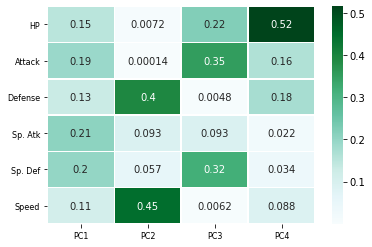

In [11]:
load_sqr = loadings**2


ax = sns.heatmap(load_sqr.transpose(), linewidths=0.5, cmap="BuGn", annot=True)
#Setting the ticks
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0, fontsize=8)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0, fontsize=8)
plt.show() 

The darkest shades in the plot above indicate which parameters are the most important. For example, the loading factors for PC4 show that HP is the most dominant parameter. That is, Pokemon with high HP will have high absolute values of PC4.

Let's look at the actual values of the loading factors now:

Below, we have created heatmap, like the one provided above, using the data from the `loadings` dataframe. 

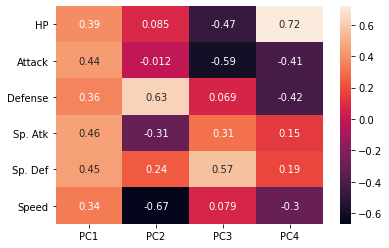

In [12]:
ax = sns.heatmap(loadings.transpose(),  annot=True)

Here you can see some more trends. For example, a Pokemon with high Defense or low Speed will have a positive value of PC2. On the other hand, things like Attack or Sp. Defense will control what value a Pokemon will have for PC3.

Yet another way to look at this is to examine the data with a biplot, which is a scatter plot with vectors indicating what direction a datapoint will take in the PCA given its underlying parameters. For fun, the Pokemon are color-coded by Type to see if there is any obvious trends.

In the code cell below, we define a function to create the biplot

In [13]:
# Create labels based on Type 1
labels = set(df['Type 1'])
df['type'] = df['Type 1']
lab_dict = dict()
for i, elem in enumerate(labels):
    lab_dict[elem] = i
df = df.replace({'type' : lab_dict})

pc_types = pcscores.copy()
pc_types['Type'] = df['Type 1']

# Biplots
def make_plot(pcscores, loadings, xval=0, yval=1, max_arrow=0.2, alpha=0.4):
    n = loadings.shape[1]
    scalex = 1.0 / (pcscores.iloc[:, xval].max() - pcscores.iloc[:, xval].min())  # Rescaling to be from -1 to +1
    scaley = 1.0 / (pcscores.iloc[:, yval].max() - pcscores.iloc[:, yval].min())

    pcscores.iloc[:, xval] = pcscores.iloc[:, xval] * scalex
    pcscores.iloc[:, yval] = pcscores.iloc[:, yval] * scaley

    g = sns.lmplot(x='PC{}'.format(xval + 1), y='PC{}'.format(yval + 1), hue='Type', data=pcscores,
                   fit_reg=False, size=6, palette='muted')

    for i in range(n):
        # Only plot the longer ones
        length = sqrt(loadings.iloc[xval, i] ** 2 + loadings.iloc[yval, i] ** 2)
        if length < max_arrow:
            continue

        plt.arrow(0, 0, loadings.iloc[xval, i], loadings.iloc[yval, i], color='k', alpha=0.9)
        plt.text(loadings.iloc[xval, i] * 1.15, loadings.iloc[yval, i] * 1.15,
                 loadings.columns.tolist()[i], color='k', ha='center', va='center')

    g.set(ylim=(-1, 1))
    g.set(xlim=(-1, 1))

[Back to top](#Index:) 
<a id='q4'></a>

### Question 3:

*10 points*
    
Using the function `make_plot` above, create a biplot. Set the argument `pcscores` equal to `pc_types`, `loadings` equal to `loadings`, `xval` equal to 2, `yval` equal to 3 and `max_arrow` equal to 0.3.

Save your image as `plot4.png` inside the results folder.

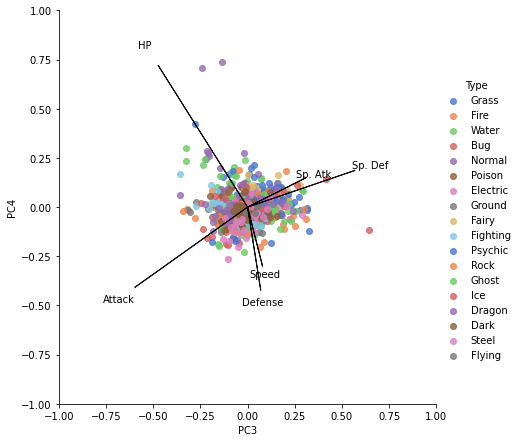

In [18]:
### GRADED 


### YOUR SOLUTION HERE
pcscores = pc_types
make_plot(pcscores, loadings, xval =2, yval= 3, max_arrow = 0.3,alpha=0.4)
plt.savefig('results/plot4.png')
###
### YOUR CODE HERE
###


In [19]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Above, you can see that Pokemon are primarily centrally distributed; that is, their stats are fairly balanced. There don't appear to be any obvious trends with type. There are some outliers, for example, 2 normal type Pokemon with high values of PC4. If you recall, PC4's loading factors indicated that HP was the dominant parameter.

[Back to top](#Index:) 
<a id='q5'></a>

### Question 4:

*10 points*

Use the `sort_values` function to sort the pc_types dataframe by `PC4` in descending order. Extract only the first two rows and assign those to the dataframe `best_pc4`.

Use `best_pc4` to filter the rows of `df` using the function `loc`. Assign the result to df_best_pc4

In [160]:
### GRADED 


### YOUR SOLUTION HERE
best_pc4 = pc_types.sort_values(by='PC4', ascending=False)[:2]
i = df[((df.id == 261) &( df.id == 121))].index
df_best_pc4 = df.drop(i, axis=0)
##
### YOUR CODE HERE
###


,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,type
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,17
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,17
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,17
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,17
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,10
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,10
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,1
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,1


In [21]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


We can also decide to check which Pokemon has the highest 'HP':

In [22]:
df.sort_values(by='HP', ascending=False)[:2]

,id,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,type
261,242,Blissey,Normal,NaN,540,255,10,10,75,135,55,2,False,0
121,113,Chansey,Normal,NaN,450,250,5,5,35,105,50,1,False,0


Indeed, the Pokemons with the highest HP also have the highest PC4, as expected.

Lastly, out of curiosity, we are interested in seeing what's the Bug-type pokemon with high PC2 and PC3 values?

[Back to top](#Index:) 
<a id='q6'></a>

### Question 5:

*5 points*

Use the `sort_values` function to sort the `pc_types` dataframe by `PC2` in descending order. Extract only the first row and assign those to the dataframe `best_pc2`.

Next, use the `sort_values` function to sort the `pc_types` dataframe by `PC3` in descending order. Extract only the first row and assign those to the dataframe `best_pc3`.

In [23]:
### GRADED 


### YOUR SOLUTION HERE
best_pc2 = pc_types.sort_values(by='PC2', ascending=False)[:1]
best_pc3 = pc_types.sort_values(by='PC3', ascending=False)[:1]

###
### YOUR CODE HERE
###


In [24]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


In the next code cell, we print `best_pc2` and `best_pc3`

In [25]:
print(best_pc2)
print(best_pc3)

          PC1      PC2       PC3       PC4 Type
230  1.076565  6.41447  0.642885 -0.118412  Bug
          PC1      PC2       PC3       PC4 Type
230  1.076565  6.41447  0.642885 -0.118412  Bug


We notice that this is really the same Pokemon! Let's see which one from our original dataframe:

In [26]:
df.loc[230]

id                213
Name          Shuckle
Type 1            Bug
Type 2           Rock
Total             505
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
type                8
Name: 230, dtype: object

This is Shuckle, a bug-type Pokemon with very high `Defense` and `Sp. Def` at the cost of `Attack` attributes. Indeed, the PC2-PC3 biplot reveals how it can be used to select high-defense Pokemon. These will be located towards the top right of (high PC2 and PC3 values).

[Back to top](#Index:) 
<a id='q7'></a>

### Question 6:

*10 points*
    
Use the function `make_plot` above, create a biplot. Set the argument `pcscores` equal to `pc_types`, `loadings` equal to `loadings`, `xval` equal to 1, `yval` equal to 2 and `max_arrow` equal to 0.3.

Save your image as `plot7.png` inside the results folder.

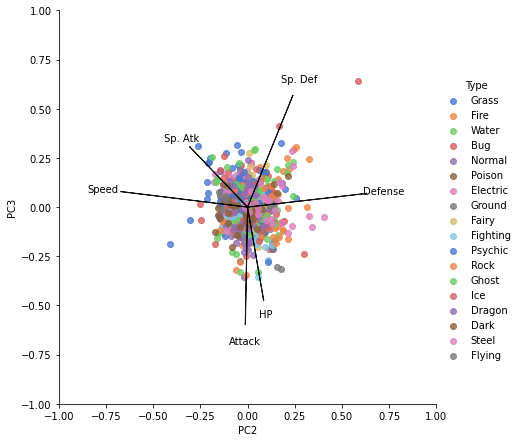

In [27]:
### GRADED 


### YOUR SOLUTION HERE
pcscores = pc_types

save = make_plot(pcscores, loadings, xval = 1, yval = 2, max_arrow =0.3)
plt.savefig('results/plot7.png')
###
### YOUR CODE HERE
###


In [28]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


We see that this Pokemon is located towards the top right (high PC2 and PC3 values).

Of course, we could go ahead and experiment with many other features. As a conclusion, one powerful thing of the PCA is the dimensionality reduction aspect of it. We went from having 6 variables to consider to only having 4. From this, it may be possible to examine fits or create classification models.

In the second part of this assignment, we will work with Markov chains.

Markov chains are one of the most useful classes of stochastic processes, being

- simple, flexible and supported by many elegant theoretical results
- valuable for building intuition about random dynamic models
- central to quantitative modeling in their own right

In this assignemnt, we review some of the theory of Markov chains and implement a few simple exercises from scratch.

Before starting, we will review some fundamentals concepts:


#### Stochastic Matrices

A **stochastic matrix** (or Markov matrix) is an $n×n$ square matrix $P$ such that  each element of $P$
is nonnegative, and each row of $P$ sums to one.
Each row of $P$ can be regarded as a probability mass function over $n$ possible outcomes.

Of course, if $P$ is a stochastic matrix, then so is the $k$-th power $P^k$.

#### Markov Chains

There is a close connection between stochastic matrices and Markov chains.

To begin, let $S$ be a finite set with $n$ elements $\{x_1,…,x_n\}$. The set $S$ is called the **state space** and $x_1,…,x_n$ are the **state values**.

A Markov chain $\{X_t\}$ on $S$ is a sequence of random variables on $S$ that have the **Markov property**.

This means that, for any date $t$ and any state $y \in S$

$$\mathbf{P}\{X_t+1=y|X_t\}=\mathbf{P}\{X_t+1=y|X_t,X_t−1,…\}$$

In other words, knowing the current state is enough to know probabilities for future states.

We begin by importing the necessary libraries for this part of the assignment. 

**NOTE:** There are many Python libraries that offer an implementation of Markov Chains, however, most of them do not allow for a random seed to be set. For this reason, results are not reproducible. For this part of the assignment we will mostly ask you about setting up simple problems. The Markov chains functions call from [`quantecon`](https://quantecon.org/quantecon-py/) will be only demonstrated to you.


In [30]:
import quantecon as qe
import numpy as np

[Back to top](#Index:) 
<a id='q8'></a>

### Question 7:

*5 points*

Let's begin with a very simple example. Define a tuple, `prob` with probabilities in [0,1] with entries 0.3 and 0.7.
Next, use the `NumPy` function `cumsum` to convert your probabilities into a cumulative distribution function. Assign this to the variable `cdf`.

In [87]:
### GRADED 


### YOUR SOLUTION HERE
prob = (0.3, 0.7)           # probabilities over {0, 1}
cdf = np.cumsum(prob)       # convert into cummulative distribution
cdf
###
### YOUR CODE HERE
###


array([0.3, 1. ])

In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


To generate, say, 10 independent draws from `cdf` we can use the function `random.draw` from `quantecon`, like so

In [36]:
qe.random.draw(cdf, 10)   # generate 10 independent draws from our cdf

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

[Back to top](#Index:) 
<a id='q9'></a>

### Question 8:

*15 points*

Next, let's try to define our own function to simulate a simple Markov chain process. 

Define a function `mc_sample_path` that takes three arguments:

- A stochastic matrix `P`
- A cumulative distribution function, `cdf`. Set this argument equal to `None` by default
- An integer, `sample_size`. Set this argument equal to 1000 by default

Your function should execute the following steps:
- Convert `P` to a `Numpy` array. Use the function `asarray`
- Create a new `Numpy` array `X` with shape equal to `sample_size` and type `int`, without initializing entries. For this, use the function `empty`.
- Convert each row of `P` into a cumulative distribution function. You can achieve this using a list comprehension.
- If `cdf` is not `None`, use the function `draw` from `quantecon` on `cdf` using the `NumPy` function `cumsum` to generate an initial state `X_0`. If `cdf` is `None` set the initial state `X_0 = 0`.
- Set the first entry of `X` equal to `X_0`.
- Use a for loop to simulate your `sample_size -1` draws. **HINT: the following state can be computed via `X[t+1] = qe.random.draw(P_dist[X[t]])`**

Your function should return one minus the mean of the array `X`.

In [98]:
### GRADED 


### YOUR SOLUTION HERE
def mc_sample_path(P, cdf=None, sample_size=1000):
    
    # set up
    P = np.asarray(P)
    X = np.empty(sample_size, dtype=int)

    # Convert each row of P into a cdf
    n = len(P)
    P_dist = [np.cumsum(P[i, :]) for i in range(n)]

    # draw initial state, defaulting to 0
    if cdf is not None:
        X_0 = qe.random.draw(np.cumsum(cdf))
    else:
        X_0 = 0

    # simulate
    X[0] = X_0
    for t in range(sample_size - 1):
        X[t+1] = qe.random.draw(P_dist[X[t]])

    return 1-np.mean(X)
###
### YOUR CODE HERE
###


In [99]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Let’s see how it works using the small matrix

In [100]:
P = [[0.4, 0.6],
     [0.2, 0.8]]

As we’ll see later, for a long series drawn from `P`, the fraction of the sample that takes value 1 will be about 0.75.

Moreover, this is true, regardless of the initial distribution from with `X_0` is drawn.

The following code illustrates this

In [101]:
X = mc_sample_path(P, sample_size=100000) 
X

0.24690999999999996

You can try changing the initial distribution to confirm that the output is always close to 0.75.



#### Using QuantEcon’s Routines

As discussed above, `QuantEcon` has routines for handling Markov chains, including simulation.

Here’s an illustration using the same P as the preceding example

In [50]:
from quantecon import MarkovChain

mc = qe.MarkovChain(P)
X = mc.simulate(ts_length=100000)
np.mean(X == 0)

0.2499

Of course, the `quantecon` routine is  much faster.

In [51]:
%time mc_sample_path(P, sample_size=5000000) # Our version


CPU times: user 3.6 s, sys: 8 ms, total: 3.6 s
Wall time: 3.6 s


array([0, 1, 0, ..., 1, 1, 1])

In [52]:
%time mc.simulate(ts_length=5000000) # qe version


CPU times: user 124 ms, sys: 32 ms, total: 156 ms
Wall time: 156 ms


array([0, 0, 1, ..., 1, 0, 0])

### Irreducibility 

Irreducibility is a central concept of modern Markov chain theory.

Let `P` be a fixed stochastic matrix. Two states `x` and `y` are said to communicate with each other if there exist positive integers `j` and `k` such that
$$P^j(x,y)>0$$ and $$P^k(y,x)>0$$
In view of our discussion above, this means precisely that state `x` can be reached eventually from state `y`, and state `y` can be reached eventually from state `x`
The stochastic matrix `P` is called irreducible if all states communicate.

For example, consider the following transition probabilities for wealth of set of households

![](./data/1.png)

We can translate this into a stochastic matrix, putting zeros where there’s no edge between nodes. It’s clear from the graph that this stochastic matrix is irreducible: we can reach any state from any other state eventually.

In [53]:
P = [[0.9, 0.1, 0.0],
     [0.4, 0.4, 0.2],
     [0.1, 0.1, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

True

[Back to top](#Index:) 
<a id='q10'></a>

### Question 9:

*10 points*

Imagine now that transition probailities for wealth of set of households get updated like the following.

![](./data/2.png)

Define a new stochastic matrix for this problem like in the example above, and assign it to the variable `P`. Will the stochastic matrix still be reducible? Assign the boolean value to `ans10`.

In [97]:
### GRADED 
P = [[1.0, 0.0, 0.0],
     [0.1, 0.8, 0.1],
     [0.0, 0.2, 0.8]]

mc = qe.MarkovChain(P, ('poor', 'middle', 'rich'))
mc.is_irreducible

### YOUR SOLUTION HERE
ans10 = False
###
### YOUR CODE HERE
###


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###
